In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_cleaned.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
udp_df = df[df['protocol_type']=='udp']
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [8]:
udp_df = udp_df.drop(['protocol_type','flag'],axis = 1)
udp_df.shape

(26703, 40)

In [5]:
features = ['duration',"service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"

In [6]:
services = udp_df['service'].unique()
services

array(['private', 'domain_u', 'other', 'ntp_u', 'tftp_u'], dtype=object)

In [7]:
target_classes = np.unique(udp_df[target])
print(target_classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [9]:
# Replacing non-attack values with 0 and values with attack as 1

for i in range(len(target_classes)):
    if i == 1:
        udp_df = udp_df.replace(target_classes[i], 0)
    else:
        udp_df = udp_df.replace(target_classes[i], 1)
        
        
        
# Replacing service classes with integer values        
        
for i in range(5):
    udp_df.replace(services[i], i-2,inplace = True)

# Difference in features

In [10]:
from sklearn.preprocessing import StandardScaler

new_df = StandardScaler().fit_transform(udp_df)

In [11]:
new_df = pd.DataFrame(new_df,columns=udp_df.columns)
new_df

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,-0.021697,-0.364825,0.557235,0.815356,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.255049,0.221173,-0.136823,-0.277322,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715
1,-0.021697,-0.364825,0.557235,0.815356,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.255049,0.221173,-0.136823,-0.277322,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715
2,-0.021697,-0.364825,0.557235,0.815356,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.255049,0.221173,-0.136823,-0.277322,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715
3,-0.021697,-0.364825,0.557235,0.815356,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.255049,0.221173,-0.136823,-0.277322,-0.040866,-0.029453,0.0,-0.076467,0.0,1.231960
4,-0.021697,-0.364825,0.557235,0.815356,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.255049,0.221173,-0.136823,-0.232501,-0.040866,-0.029453,0.0,-0.076467,0.0,1.231960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,-0.021697,-0.364825,0.557235,0.830844,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.274679,0.221173,-0.224688,-0.232501,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715
26699,-0.021697,-0.364825,0.557235,0.830844,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.274679,0.221173,-0.224688,-0.232501,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715
26700,-0.021697,-0.364825,0.557235,0.830844,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.274679,0.221173,-0.224688,-0.232501,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715
26701,-0.021697,-0.364825,0.557235,0.830844,0.0,-0.042098,0.0,0.0,0.0,0.0,...,0.274679,0.221173,-0.224688,-0.232501,-0.040866,-0.029453,0.0,-0.076467,0.0,-0.811715


In [12]:
new_df = new_df.groupby(udp_df['result']).mean()
new_df = new_df.transpose()
new_df.columns = ['Normal','Attack']
new_df

,Normal,Attack
duration,-0.020824,-0.021598
service,0.576045,0.573245
src_bytes,-0.250602,-0.350094
dst_bytes,0.316208,0.238051
land,0.000000,0.000000
wrong_fragment,-0.042098,-0.042098
urgent,0.000000,0.000000
hot,0.000000,0.000000
num_failed_logins,0.000000,0.000000
logged_in,0.000000,0.000000


In [15]:
filter_new_df = new_df.loc[['src_bytes','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
                     'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                     'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_rerror_rate'
                    ]]

filter_new_df

,Normal,Attack
src_bytes,-0.250602,-0.350094
srv_diff_host_rate,-0.004497,-0.132078
dst_host_count,-0.276498,-0.168420
dst_host_srv_count,-0.192214,-0.211261
dst_host_same_srv_rate,-0.091351,-0.183616
dst_host_diff_srv_rate,-0.088673,0.016815
dst_host_same_src_port_rate,-0.019513,0.032069
dst_host_srv_diff_host_rate,0.024628,0.003164
dst_host_serror_rate,-0.029453,0.037375
dst_host_rerror_rate,-0.024904,0.324987


In [16]:
filter_new_df = filter_new_df.set_index(pd.Index(['SB','SDHR','DHC','DHSR','DHSSR','DHDSR','DHSSPR','DHSDHR','DHSR','DHRR'])) 
filter_new_df.index

Index(['SB', 'SDHR', 'DHC', 'DHSR', 'DHSSR', 'DHDSR', 'DHSSPR', 'DHSDHR',
       'DHSR', 'DHRR'],
      dtype='object')

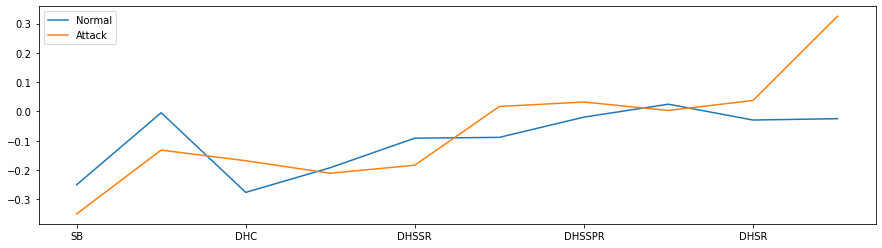

In [29]:
filter_new_df.plot(figsize=(15,4),x_compat = True)

# HeatMap

[]

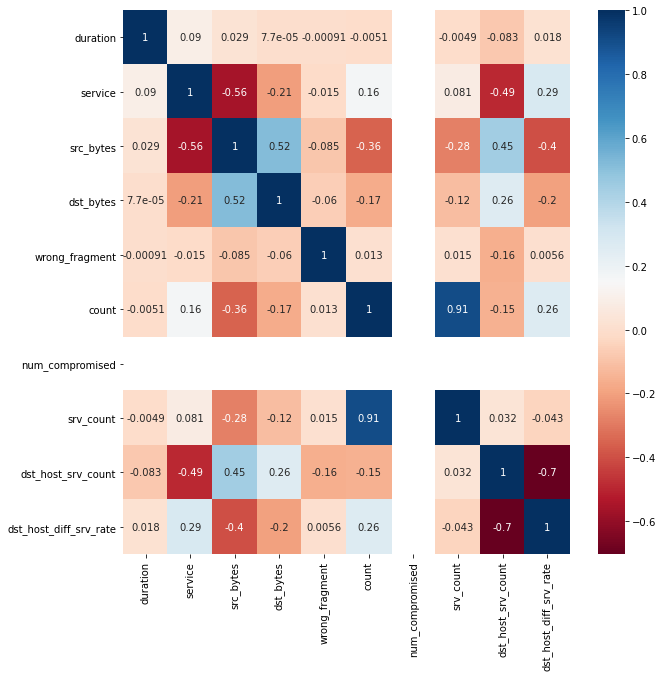

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(udp_df[features].corr(), annot=True,cmap="RdBu")
plt.plot()




# Evaluating most important features

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(udp_df[features],udp_df[target])
print(pd.Series(rfc.feature_importances_,index=features).sort_values(ascending=False))

dst_bytes                 0.319962
src_bytes                 0.186389
srv_count                 0.127508
dst_host_srv_count        0.124735
service                   0.107247
count                     0.098525
dst_host_diff_srv_rate    0.034074
duration                  0.000919
wrong_fragment            0.000641
num_compromised           0.000000
dtype: float64


# Machine Learning Model

In [20]:
# Roping in the most important features

X = udp_df[['dst_bytes','src_bytes','srv_count','dst_host_srv_count','service','count']]
y = udp_df[target]

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

In [23]:
models = [('Logistic Regression',LogisticRegression(solver='liblinear')), 
          ('KNN Classifier',KNeighborsClassifier(n_neighbors=3)),
          ('MLP Classifer',MLPClassifier(alpha=0.005)),
          ('Decision Tree Classifier',DecisionTreeClassifier(random_state=3)),
          ('Random Forest Classfier',RandomForestClassifier(random_state=3))
         ]

scores=list()

In [24]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    
    print('\n',name)
    print('---------------------------------')
    print("Accuracy of the model is: ", score)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("*=============================================================*")


 Logistic Regression
---------------------------------
Accuracy of the model is:  73.91087255024341
Confusion Matrix:
 [[3846  986]
 [1104 2075]]
Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      4832
           1       0.68      0.65      0.67      3179

    accuracy                           0.74      8011
   macro avg       0.73      0.72      0.73      8011
weighted avg       0.74      0.74      0.74      8011

*=============================================================*

 KNN Classifier
---------------------------------
Accuracy of the model is:  73.14941954812133
Confusion Matrix:
 [[3917  915]
 [1236 1943]]
Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78      4832
           1       0.68      0.61      0.64      3179

    accuracy                           0.73      8011
   macro avg       0.72      0.71      0.71      8011
weighted avg       0.73      0

# Final Results

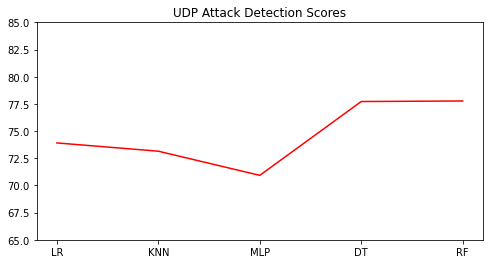

In [25]:
classifiers = ['LR','KNN','MLP','DT','RF']
plt.figure(figsize=(8,4))
plt.plot(classifiers,scores,color = 'r')
plt.title("UDP Attack Detection Scores")
plt.ylim(65,85)
plt.show()

In [26]:
res = pd.read_csv('./datasets/Final_Result.csv',index_col=0)
res

,ICMP,TCP
Logistic Regression,99.915136,88.399240
KNN Classifier,99.987877,99.681635
MLP Classifer,99.886848,96.126564
Decision Tree Classifier,99.987877,99.829647
Random Forest Classfier,99.981815,99.835232


In [27]:
res['UDP'] = scores
res

,ICMP,TCP,UDP
Logistic Regression,99.915136,88.399240,73.910873
KNN Classifier,99.987877,99.681635,73.149420
MLP Classifer,99.886848,96.126564,70.927475
Decision Tree Classifier,99.987877,99.829647,77.718138
Random Forest Classfier,99.981815,99.835232,77.768069


In [28]:
res.to_csv('./datasets/Final_Result.csv')